<a href="https://colab.research.google.com/github/ginny0410/aop113b/blob/main/EX03_06_%E5%87%BA%E7%94%9F%E4%BA%BA%E5%8F%A3%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O births.xls https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls

--2025-05-09 02:06:43--  https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297984 (291K) [application/octet-stream]
Saving to: ‘births.xls’

births.xls          100%[===================>] 291.00K  --.-KB/s    in 0.03s   

2025-05-09 02:06:43 (8.68 MB/s) - ‘births.xls’ saved [297984/297984]



In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/imchihchao/aop113b/main/materials/03-births.xls'
excel_data=pd.ExcelFile(url)

area=['新北市','臺北市','桃園市','臺中市’,‘臺南市','高雄市']
year = [str(i) for i in range(112, 98, -1)] #from99

df = pd.DataFrame()

for sheet_name in excel_data.sheet_names:
  if sheet_name in year:
    df_yr = pd.read_excel(excel_data, sheet_name=sheet_name, header=4)
    df_yr = df_yr.iloc[:,0:2] #縣市及出生人口數
    df_yr.iloc[:, 0] =df_yr.iloc[:, 0].str.replace(" ","") # 去除早期資料中縣市名稱中間有空白
    df_yr.columns = ['county','births']
    df_yr = df_yr[df_yr['county'].isin(area)] #六都資料
    df_yr.loc[:,'year'] = f'{sheet_name:>03}'#補足99年數字為三位數
    df = pd.concat([df,df_yr], ignore_index=True)
df

,county,births,year
0,新北市,18157.0,112
1,臺北市,15920.0,112
2,桃園市,17662.0,112
3,高雄市,15589.0,112
4,新北市,21273.0,111
5,臺北市,14279.0,111
6,桃園市,17982.0,111
7,高雄市,15959.0,111
8,新北市,24730.0,110
9,臺北市,17112.0,110


In [5]:
pvt1 = pd.pivot_table(df, index='year', values='births', aggfunc='mean')
pvt1

,births
year,
099,21581.666667
100,27245.333333
101,32544.666667
102,27499.0
103,26954.0
104,27494.5
105,26844.0
106,25132.25
107,23504.25


<Axes: xlabel='year'>

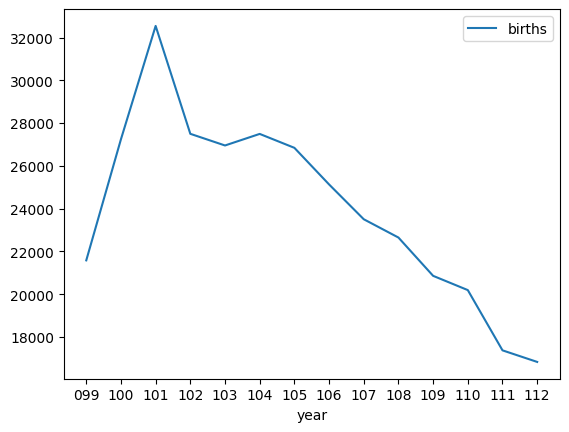

In [6]:
import seaborn as sns
sns.lineplot(data=pvt1)

In [7]:
pvt2 = pd.pivot_table(df, index='year', columns='county', values='births')
pvt2

county,新北市,桃園市,臺北市,高雄市
year,,,,
099,27493.0,NaN,18677.0,18575.0
100,34682.0,NaN,25439.0,21615.0
101,41935.0,NaN,30232.0,25467.0
102,35188.0,NaN,26175.0,21134.0
103,38563.0,17471.0,29174.0,22608.0
104,36078.0,22513.0,28865.0,22522.0
105,34148.0,23752.0,27785.0,21691.0
106,31621.0,23430.0,25004.0,20474.0
107,28745.0,22568.0,22663.0,20041.0


<Axes: xlabel='year'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26691 (\N{CJK UNIFIED IDEOGRAPH-6843}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22290 (\N{CJK UNIFIED IDEOGRAPH-5712}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

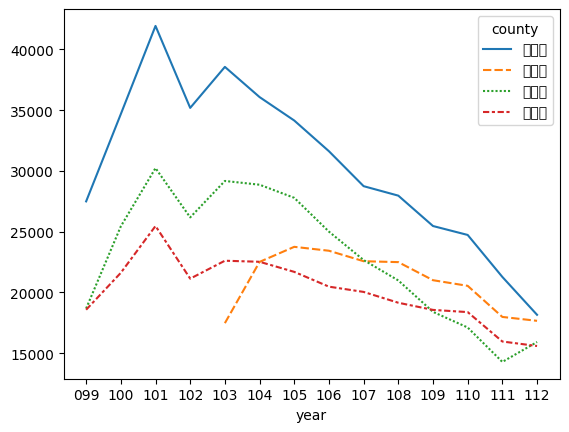

In [8]:
sns.lineplot(data=pvt2)

In [9]:
pvt3 = pd.pivot_table(df, index='county', values='births', aggfunc=['mean', 'max','min'])
pvt3

,mean,max,min
,births,births,births
county,,,
新北市,30431.642857,41935.0,18157.0
桃園市,20941.7,23752.0,17471.0
臺北市,22907.857143,30232.0,14279.0
高雄市,20126.142857,25467.0,15589.0


<Axes: xlabel='county', ylabel="('mean', 'births')">

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26691 (\N{CJK UNIFIED IDEOGRAPH-6843}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22290 (\N{CJK UNIFIED IDEOGRAPH-5712}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

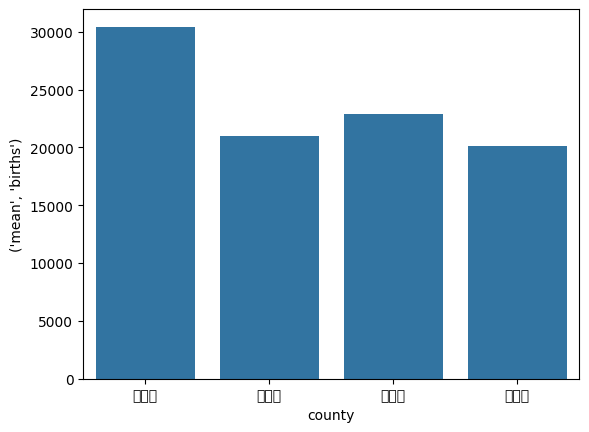

In [10]:
sns.barplot(data=pvt3,x='county',y=('mean','births'))

<Axes: xlabel='county', ylabel='births'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 33274 (\N{CJK UNIFIED IDEOGRAPH-81FA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26691 (\N{CJK UNIFIED IDEOGRAPH-6843}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

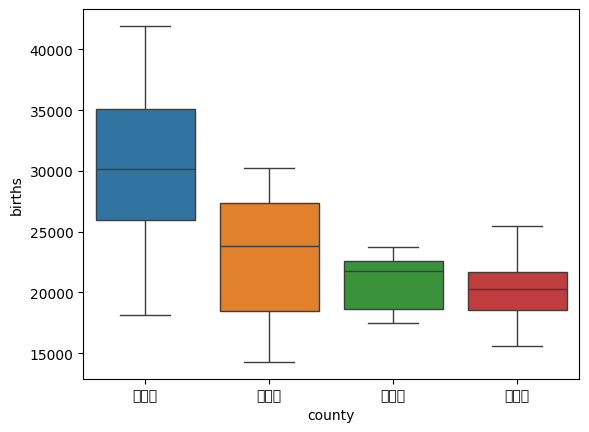

In [11]:
sns.boxplot(data=df, x='county', y='births', hue='county')